## Import Liberaries

In [373]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



## Explore Data

In [374]:
df = pd.read_csv("Diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Detailed explanation of each column in the dataset:

1- **Pregnancies** – The number of times the patient has been pregnant. This is a numerical value and is relevant because pregnancy can impact glucose levels and insulin sensitivity.

2- **Glucose** – The plasma glucose concentration (mg/dL) measured during an oral glucose tolerance test. High levels can indicate diabetes or prediabetes.

3- **Blood Pressure** – The diastolic blood pressure (mm Hg). Elevated blood pressure is a risk factor for diabetes and other cardiovascular diseases.

4- **Skin Thickness** – The thickness of the triceps skinfold (in mm). This measurement is used to estimate body fat percentage, which can be linked to diabetes risk.

5- **Insulin** – The serum insulin level (mu U/ml). Insulin is a hormone that regulates blood sugar, and abnormal levels can indicate insulin resistance or diabetes.

6- **BMI (Body Mass Index)**– A measure of body fat calculated as weight (kg) divided by height (m²). Higher BMI values are associated with a higher risk of diabetes.

7- **Diabetes Pedigree Function** – A score that represents genetic predisposition to diabetes based on family history. A higher value indicates a greater likelihood of diabetes.

8- **Age** – The patient's age in years. Older individuals are at a higher risk of developing diabetes.

9- **Outcome** – The target variable (0 or 1), where:

0 means the patient does not have diabetes.
1 means the patient has diabetes.

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [376]:
df.duplicated().sum()

np.int64(0)

In [377]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The data is generally logical but contains unrealistic zero values ​​in some columns (Glucose, BloodPressure, SkinThickness, Insulin, BMI). 

 Zero values ​​should be processed because they represent missing data and not true zeros.

In [378]:
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)

for col in cols_to_fix:
    df[col].fillna(df[col].median(), inplace=True)

Replace Outliers values ​​with average values.

In [379]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols:
    median = df[col].median()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])


In [380]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.108073,28.759115,124.972656,32.206380,0.471876,33.240885,0.348958
std,3.369578,30.438286,10.874178,5.766472,1.698387,6.410497,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,15.000000,114.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,27.000000,125.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,30.000000,125.000000,36.300000,0.626250,41.000000,1.000000
max,17.000000,199.000000,104.000000,42.000000,135.000000,50.000000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

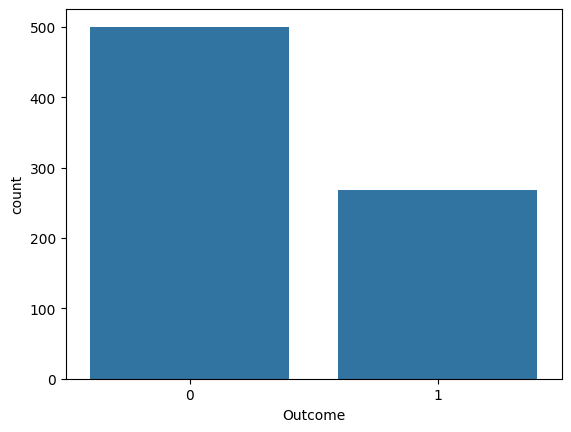

In [381]:
sns.countplot(x='Outcome',data=df)

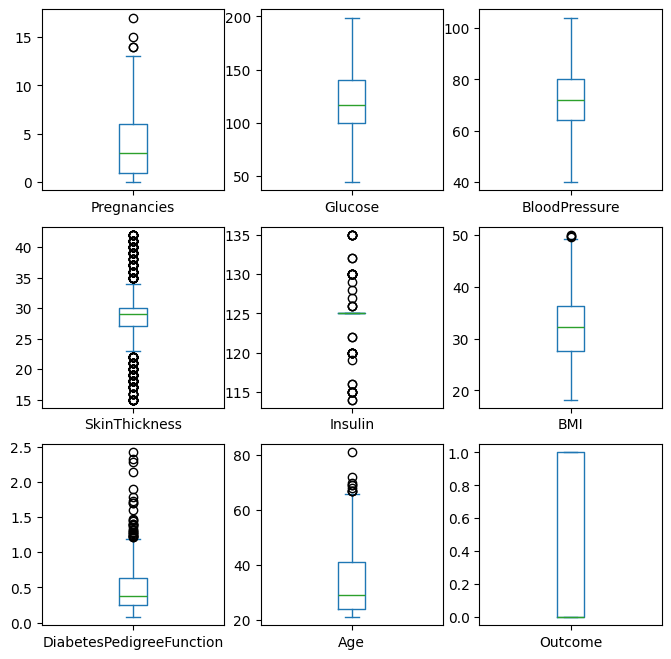

In [382]:
boxplot = df.plot(kind='box',subplots=True,layout=(3,3),figsize=(8,8))

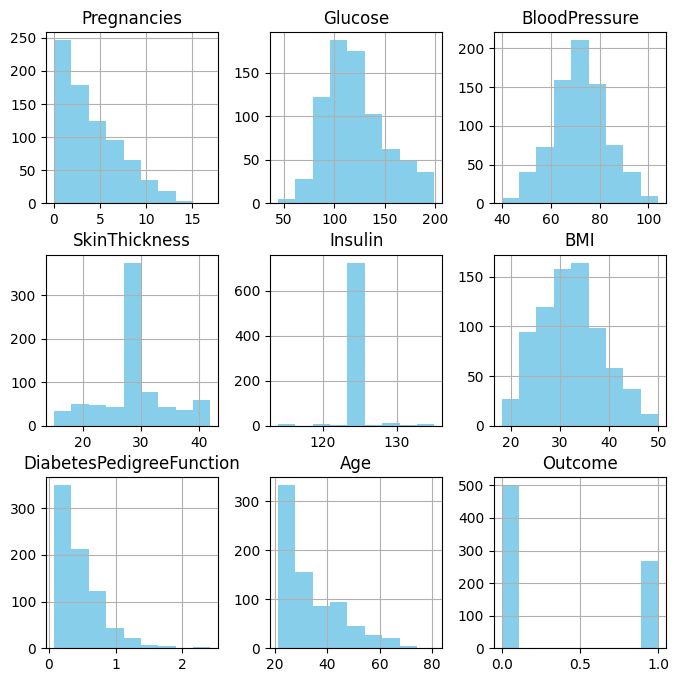

In [383]:
df.hist(bins=9,figsize=(8,8),color='skyblue' )
plt.show()

In [384]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,125.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,125.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,29.0,125.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,125.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [385]:
pregnancies = df.groupby('Pregnancies')['Outcome'].mean()

In [386]:
import matplotlib.pyplot as plt


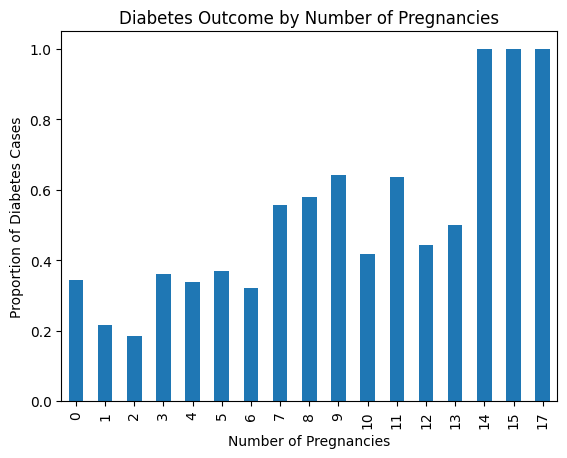

In [387]:
import matplotlib.pyplot as plt

pregnancies.plot(kind='bar')
plt.xlabel("Number of Pregnancies")
plt.ylabel("Proportion of Diabetes Cases")
plt.title("Diabetes Outcome by Number of Pregnancies")
plt.show()

In [388]:
CLucose_Insulin = df.groupby(['Glucose','Insulin'])['Outcome'].mean()
CLucose_Insulin


Glucose  Insulin
44.0     125.0      0.00
56.0     125.0      0.00
57.0     125.0      0.00
61.0     125.0      0.00
62.0     125.0      0.00
                    ... 
195.0    125.0      1.00
196.0    125.0      1.00
197.0    125.0      0.75
198.0    125.0      1.00
199.0    125.0      1.00
Name: Outcome, Length: 177, dtype: float64

In [389]:
BMI_otcm = df.groupby(['BMI','SkinThickness'])['Outcome'].mean()
CLucose_Insulin

Glucose  Insulin
44.0     125.0      0.00
56.0     125.0      0.00
57.0     125.0      0.00
61.0     125.0      0.00
62.0     125.0      0.00
                    ... 
195.0    125.0      1.00
196.0    125.0      1.00
197.0    125.0      0.75
198.0    125.0      1.00
199.0    125.0      1.00
Name: Outcome, Length: 177, dtype: float64

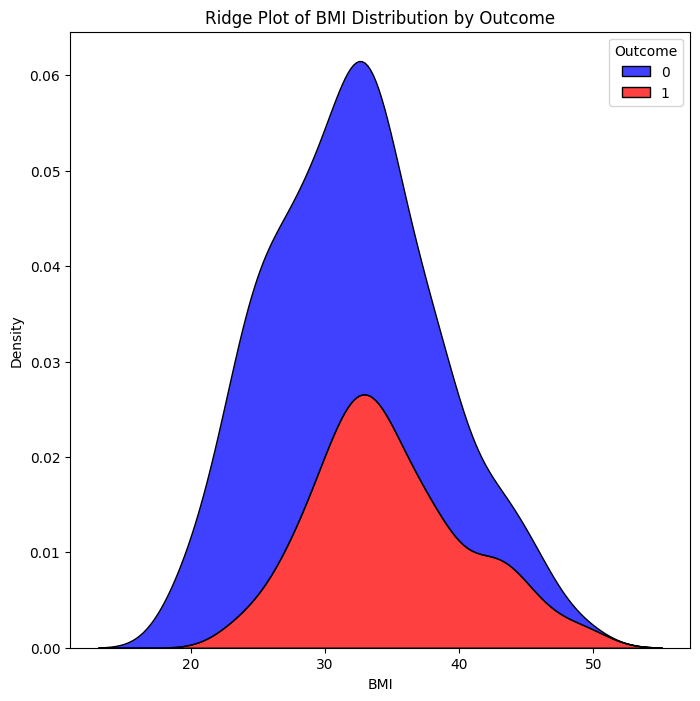

In [390]:
plt.figure(figsize=(8, 8))
sns.kdeplot(data=df, x='BMI', hue='Outcome', multiple='stack', palette=['b', 'r'])
plt.title('Ridge Plot of BMI Distribution by Outcome')
plt.show()

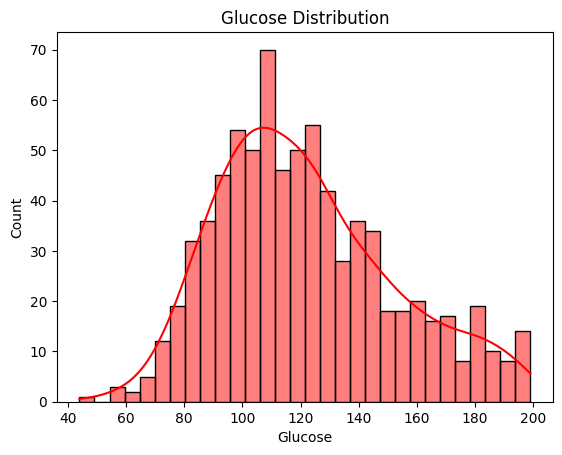

In [392]:
sns.histplot(df['Glucose'], kde=True, bins=30,color='red')
plt.title("Glucose Distribution")
plt.show()

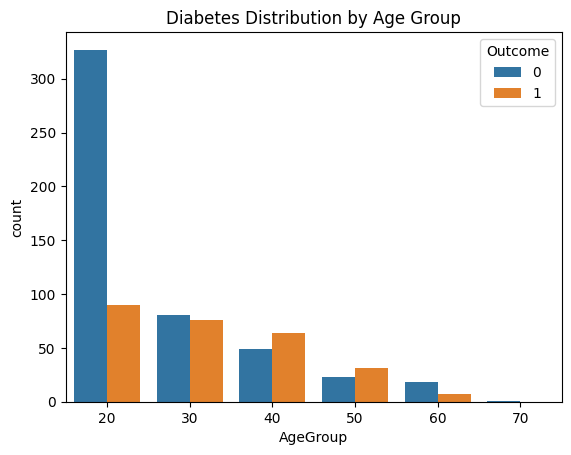

In [393]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80], labels=['20','30','40','50','60','70'])
sns.countplot(x='AgeGroup', hue='Outcome', data=df)
plt.title("Diabetes Distribution by Age Group")
plt.show()


In [394]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
AgeGroup                    1
dtype: int64

In [395]:
df['AgeGroup'].fillna(df['AgeGroup'].mode()[0], inplace=True)


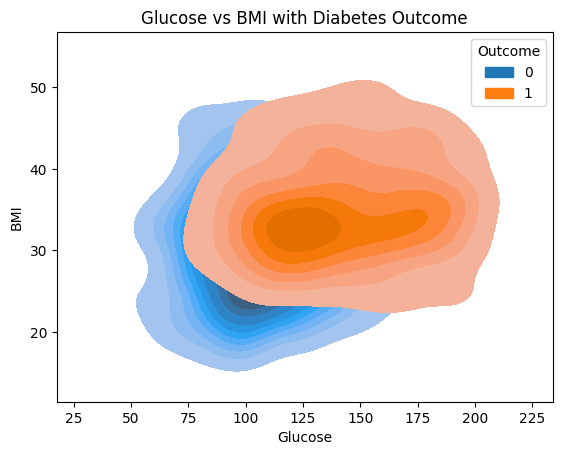

In [396]:
sns.kdeplot(x=df['Glucose'], y=df['BMI'], hue=df['Outcome'], fill=True)
plt.title("Glucose vs BMI with Diabetes Outcome")
plt.show()


In [397]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,40
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,30
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,30
3,1,89.0,66.0,23.0,125.0,28.1,0.167,21,0,20
4,0,137.0,40.0,35.0,125.0,43.1,2.288,33,1,30
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,29.0,125.0,32.9,0.171,63,0,60
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0,20
765,5,121.0,72.0,23.0,125.0,26.2,0.245,30,0,20
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1,40


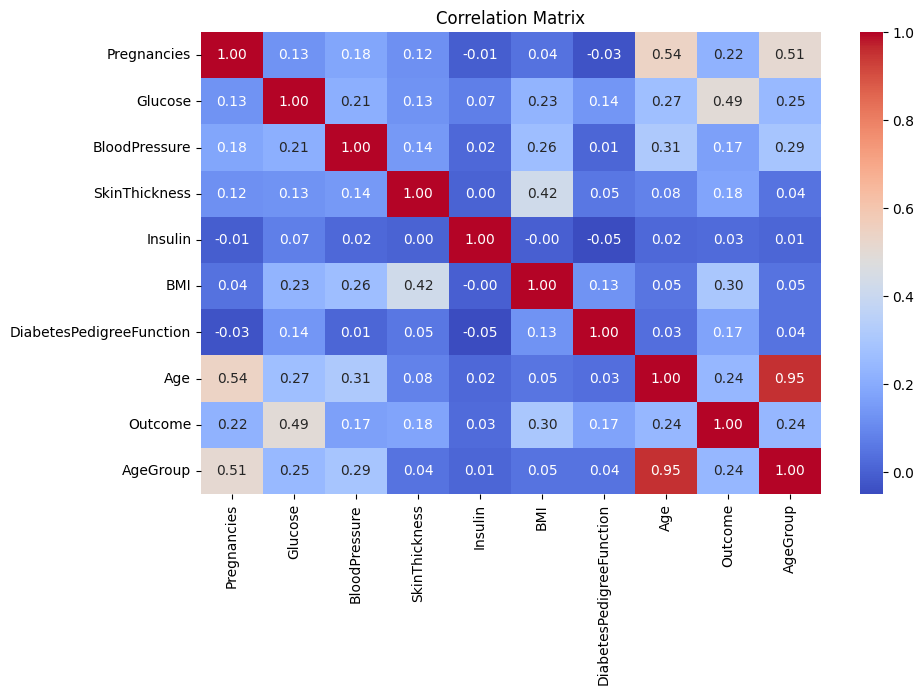

In [398]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [399]:
for col in df.columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if not non_numeric.empty:
        print(f"Column: {col}, Non-numeric values: {non_numeric[col].unique()}")


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   AgeGroup                  768 non-null    category
dtypes: category(1), float64(6), int64(3)
memory usage: 55.1 KB


In [401]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

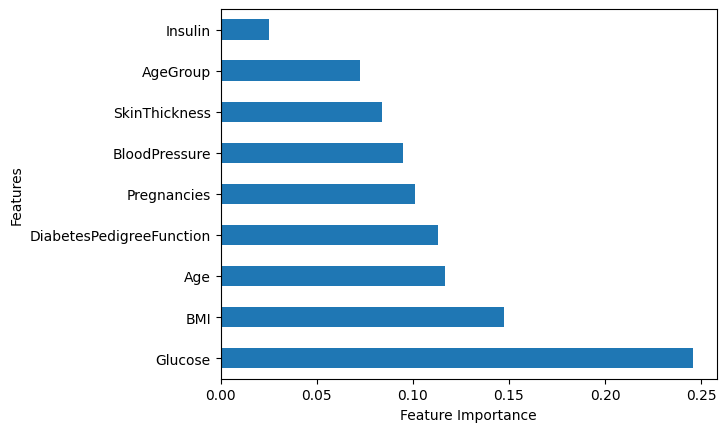

In [402]:
feat_selection=ExtraTreesClassifier()
feat_selection.fit(X,y)
feat_importances=pd.Series(feat_selection.feature_importances_,index=X.columns)
feat_importances.nlargest(len(df.columns)).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [404]:
model = RandomForestClassifier(n_estimators=11, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=11, random_state=42)

In [405]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


              precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.78      0.79      0.79       154

Accuracy: 0.79


In [406]:
model.score(X_train, y_train)

0.988599348534202

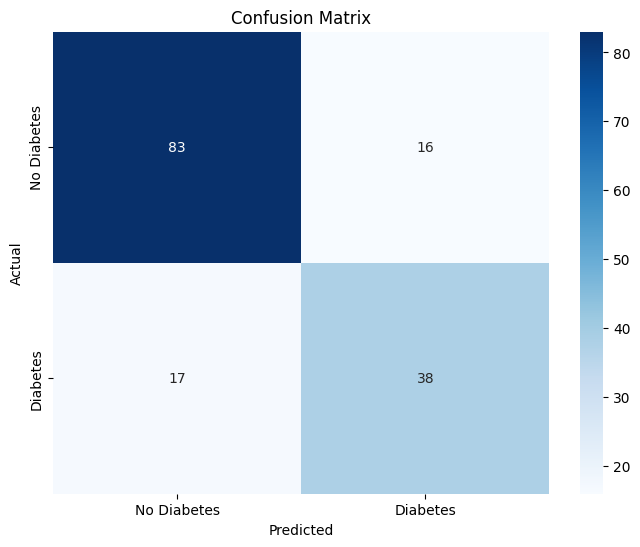

In [407]:
Conf_matrix =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(Conf_matrix,annot=True,fmt='d',cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [408]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [409]:


model2 =SVC(kernel="rbf",C=1, gamma='scale')

In [410]:
model2.fit(X_train, y_train)


SVC(C=1)

In [411]:
model2.score(X_test,y_test)

0.7857142857142857

In [412]:
model2.score(X_train, y_train)

0.8273615635179153

🔹 SVM Model Accuracy: 78.57%


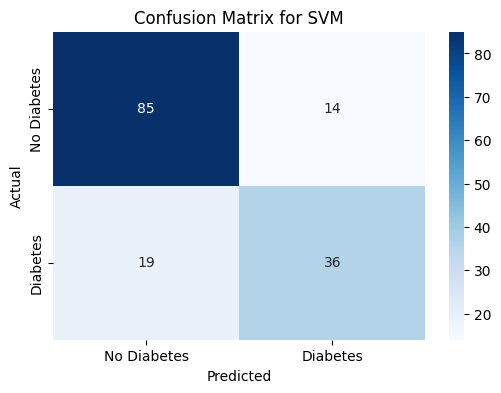

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [413]:
y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"🔹 SVM Model Accuracy: {accuracy:.2%}")

cm = confusion_matrix(y_test, y_pred)
labels = ["No Diabetes", "Diabetes"]

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM")
plt.show()

print(classification_report(y_test, y_pred))